# Lab 2

## Part 1

In [89]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [90]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [91]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Network architecture, compilation, training and validation

In [92]:
network = models.Sequential()

network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

history = network.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
35/35 [==============================] - 1s 11ms/step - loss: 0.5004 - accuracy: 0.7862 - val_loss: 0.3702 - val_accuracy: 0.8699
Epoch 2/20
35/35 [==============================] - 0s 4ms/step - loss: 0.3042 - accuracy: 0.8967 - val_loss: 0.2892 - val_accuracy: 0.8939
Epoch 3/20
35/35 [==============================] - 0s 4ms/step - loss: 0.2321 - accuracy: 0.9199 - val_loss: 0.2678 - val_accuracy: 0.8956
Epoch 4/20
35/35 [==============================] - 0s 4ms/step - loss: 0.1912 - accuracy: 0.9324 - val_loss: 0.2642 - val_accuracy: 0.8949
Epoch 5/20
35/35 [==============================] - 0s 4ms/step - loss: 0.1604 - accuracy: 0.9476 - val_loss: 0.3538 - val_accuracy: 0.8616
Epoch 6/20
35/35 [==============================] - 0s 4ms/step - loss: 0.1414 - accuracy: 0.9539 - val_loss: 0.3043 - val_accuracy: 0.8873
Epoch 7/20
35/35 [==============================] - 0s 4ms/step - loss: 0.1224 - accuracy: 0.9606 - val_loss: 0.2940 - val_accuracy: 0.8908
Epoch 8/20
35/35 [=

### History dict

Text(0.5, 1.0, 'validation loss')

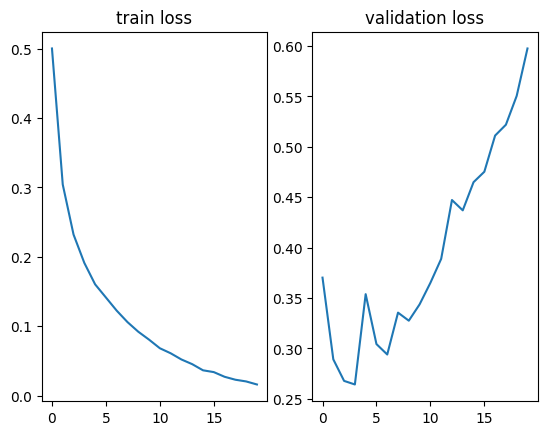

In [93]:
history_dict = history.history
history_dict.keys()

plt.subplot(1,2,1)
plt.plot(history_dict['loss'])
plt.title('train loss')
plt.subplot(1,2,2)
plt.plot(history_dict['val_loss'])
plt.title('validation loss')

### Evaluate on test set

In [94]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test_acc:', test_acc)

782/782 [==============================] - 1s 1ms/step - loss: 0.6716 - accuracy: 0.8522
test_acc: 0.8521999716758728


## Part 2

In [95]:
import tensorflow as tf

### Callbacks

In [96]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True


callbacks = myCallback()

Epoch 1/20
15/35 [===========>..................] - ETA: 0s - loss: 0.0103 - accuracy: 0.9995
Reached 90% accuracy so cancelling training!
782/782 [==============================] - 1s 1ms/step - loss: 0.6804 - accuracy: 0.8542
test_acc: 0.854200005531311


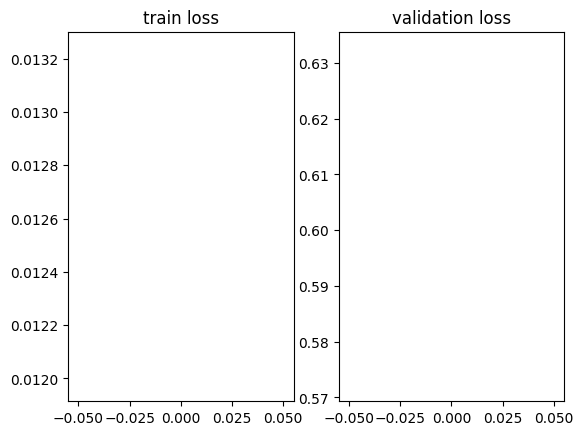

In [97]:
history = network.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), callbacks=[callbacks])

history_dict = history.history
history_dict.keys()

plt.subplot(1,2,1)
plt.plot(history_dict['loss'])
plt.title('train loss')
plt.subplot(1,2,2)
plt.plot(history_dict['val_loss'])
plt.title('validation loss')

test_loss, test_acc = network.evaluate(x_test, y_test)
print('test_acc:', test_acc)

### Optimisation algorithms from sklearn

In [98]:
from sklearn.model_selection import GridSearchCV
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
# in Google Colab you may need to use !pip install scikeras 
# in a block before for it to work properly.
 
def create_model():
    network = models.Sequential()
    network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    network.add(layers.Dense(1, activation='sigmoid'))
 
    network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
 
    return network
 
model = KerasClassifier(build_fn=create_model)
 
par1_batch = [32, 64]
par2_epoch = [3, 5]
 
param_grid = dict(batch_size=par1_batch,
                  epochs=par2_epoch
                  )
 
grid = GridSearchCV(estimator=model,                     
                    param_grid=param_grid,
                    cv = 3
                    )
 
grid_results = grid.fit(x_train, y_train)
 
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

/home/karolina/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
365/365 [==============================] - 1s 3ms/step - loss: 0.3837 - accuracy: 0.8382
Epoch 2/3
365/365 [==============================] - 1s 2ms/step - loss: 0.2059 - accuracy: 0.9207
Epoch 3/3
183/183 [==============================] - 0s 844us/step


/home/karolina/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
365/365 [==============================] - 1s 2ms/step - loss: 0.4044 - accuracy: 0.8401
Epoch 2/3
365/365 [==============================] - 1s 3ms/step - loss: 0.2085 - accuracy: 0.9230
Epoch 3/3
183/183 [==============================] - 0s 1ms/step


/home/karolina/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
365/365 [==============================] - 1s 3ms/step - loss: 0.3793 - accuracy: 0.8388
Epoch 2/3
365/365 [==============================] - 1s 3ms/step - loss: 0.2059 - accuracy: 0.9232
Epoch 3/3
183/183 [==============================] - 0s 2ms/step


/home/karolina/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
365/365 [==============================] - 1s 2ms/step - loss: 0.3709 - accuracy: 0.8463
Epoch 2/5
365/365 [==============================] - 1s 3ms/step - loss: 0.2027 - accuracy: 0.9219
Epoch 3/5
365/365 [==============================] - 1s 3ms/step - loss: 0.1477 - accuracy: 0.9448
Epoch 4/5
365/365 [==============================] - 1s 2ms/step - loss: 0.1134 - accuracy: 0.9601
Epoch 5/5
183/183 [==============================] - 0s 1ms/step


/home/karolina/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
365/365 [==============================] - 1s 3ms/step - loss: 0.3677 - accuracy: 0.8460
Epoch 2/5
365/365 [==============================] - 1s 3ms/step - loss: 0.1943 - accuracy: 0.9281
Epoch 3/5
365/365 [==============================] - 1s 3ms/step - loss: 0.1397 - accuracy: 0.9482
Epoch 4/5
365/365 [==============================] - 1s 2ms/step - loss: 0.1027 - accuracy: 0.9640
Epoch 5/5
183/183 [==============================] - 0s 1ms/step


/home/karolina/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
365/365 [==============================] - 1s 3ms/step - loss: 0.3676 - accuracy: 0.8503
Epoch 2/5
365/365 [==============================] - 1s 3ms/step - loss: 0.1983 - accuracy: 0.9250
Epoch 3/5
365/365 [==============================] - 1s 2ms/step - loss: 0.1426 - accuracy: 0.9498
Epoch 4/5
365/365 [==============================] - 1s 3ms/step - loss: 0.1044 - accuracy: 0.9632
Epoch 5/5
183/183 [==============================] - 0s 1ms/step


/home/karolina/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
183/183 [==============================] - 1s 2ms/step - loss: 0.3889 - accuracy: 0.8383
Epoch 2/3
183/183 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9235
Epoch 3/3
92/92 [==============================] - 0s 2ms/step


/home/karolina/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
183/183 [==============================] - 1s 2ms/step - loss: 0.4022 - accuracy: 0.8311
Epoch 2/3
183/183 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9213
Epoch 3/3
92/92 [==============================] - 0s 961us/step


/home/karolina/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
183/183 [==============================] - 1s 2ms/step - loss: 0.4151 - accuracy: 0.8296
Epoch 2/3
183/183 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9229
Epoch 3/3
92/92 [==============================] - 0s 573us/step


/home/karolina/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
183/183 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8279
Epoch 2/5
183/183 [==============================] - 0s 3ms/step - loss: 0.2135 - accuracy: 0.9205
Epoch 3/5
183/183 [==============================] - 1s 3ms/step - loss: 0.1505 - accuracy: 0.9474
Epoch 4/5
183/183 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.9607
Epoch 5/5
92/92 [==============================] - 0s 952us/step


/home/karolina/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
183/183 [==============================] - 1s 2ms/step - loss: 0.3950 - accuracy: 0.8413
Epoch 2/5
183/183 [==============================] - 1s 3ms/step - loss: 0.2006 - accuracy: 0.9255
Epoch 3/5
183/183 [==============================] - 0s 2ms/step - loss: 0.1403 - accuracy: 0.9501
Epoch 4/5
183/183 [==============================] - 1s 3ms/step - loss: 0.1008 - accuracy: 0.9661
Epoch 5/5
92/92 [==============================] - 0s 1ms/step


/home/karolina/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
183/183 [==============================] - 1s 2ms/step - loss: 0.4039 - accuracy: 0.8399
Epoch 2/5
183/183 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9221
Epoch 3/5
183/183 [==============================] - 1s 3ms/step - loss: 0.1435 - accuracy: 0.9481
Epoch 4/5
183/183 [==============================] - 1s 3ms/step - loss: 0.1031 - accuracy: 0.9659
Epoch 5/5
92/92 [==============================] - 0s 804us/step


/home/karolina/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
547/547 [==============================] - 2s 3ms/step - loss: 0.3480 - accuracy: 0.8590
Epoch 2/3
547/547 [==============================] - 2s 3ms/step - loss: 0.2077 - accuracy: 0.9213
Epoch 3/3
547/547 [==============================] - 1s 2ms/step - loss: 0.1676 - accuracy: 0.9386
Best: 0.877657 using {'batch_size': 32, 'epochs': 3}


In [101]:
import sklearn
import scikeras
print("TensorFlow Version:", tf.__version__)
print("Scikit-Learn Version:", sklearn.__version__)
print("Scikeras: ", scikeras.__version__)

TensorFlow Version: 2.13.1
Scikit-Learn Version: 1.3.2
Scikeras:  0.12.0
